<a href="https://colab.research.google.com/github/kimjunwoo990330/Machine-Learning/blob/main/Machine_Learning_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 초기 설정

1. 설명 : 선형회귀 모델을 구축하여 통계적으로 해석
2. 예측 : 새로운 입력데이터의 미래의 반응변수 값을 예측해보고 평가하기


In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
#선형회귀에서 통계분석을 같이 하고 싶다면 statsmodels을 쓰는 것이 더 좋다.

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

import seaborn as sns # matplotlib 기반의 시각화 라이브러리이다. 유익한 통계 그래픽을 그리기 위한 고급 인터페이스를 제공한다.
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
#폰트 설정
import sys
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive'|debconf-set-selections

    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)
plt.rcParams['font.family']='NanumGothic'

Selecting previously unselected package fonts-nanum.
(Reading database ... 123071 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [ ]:
#gdown을 이용하여 csv파일을 가져온다
import gdown
!gdown https://drive.google.com/uc?id=12kKrD3YwDkUEZQ7x401YobnH9w4PNJeG

# 1978년 보스턴 주택 가격에 대한 데이터 추출
df = pd.read_csv('Boston.csv',index_col=0)
# 1행~13행까지의 입력데이터X 추출
raw_df=df.iloc[:,:-1]
raw_df.head()

Downloading...
From: https://drive.google.com/uc?id=12kKrD3YwDkUEZQ7x401YobnH9w4PNJeG
To: /content/Boston.csv
100% 37.7k/37.7k [00:00<00:00, 47.1MB/s]


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [ ]:
# 14행의 타겟데이터Y 추출
target=df.iloc[:,-1]
target=pd.DataFrame(target,columns=['medv'])

In [ ]:
target.head()

,medv
1,24.0
2,21.6
3,34.7
4,33.4
5,36.2


## 선형회귀 모델 구축하기

In [ ]:
# 훈련에 사용할 데이터 X, 테스트에 사용할 데이터 Y를 나눈다.
x_train,x_test,y_train,y_test=train_test_split(raw_df,target,test_size=0.2,random_state=2021)

statsmodels의 OLS를 사용하여 선형화귀분석 시행

OLS : Ordinary Least Squares

잔차제곱합을 최소화하는 가중치(파라미터)를 구하는 방법

선형회귀모델 구축하고  선형회귀 모델의 가정이 성립하는가를 확인한다.

확률오차의 정규성과 등분산성을 확인해야한다.

In [ ]:
#절편을 추가한다.
train_input=sm.add_constant(x_train)

#OLS를 이용하여 모델을 구축
model=sm.OLS(y_train,x_train,axis=1)

#구축한 모델을 훈련한다.
model_trained=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['axis']
  warnings.warn(msg, ValueWarning)


# 확률오차의 정규성 확인


선형회귀 모델의 가정에 충족하는지 확인을 먼저 한다.

따라서 확률오차의 정규성과 등분산성을 확인한다.

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


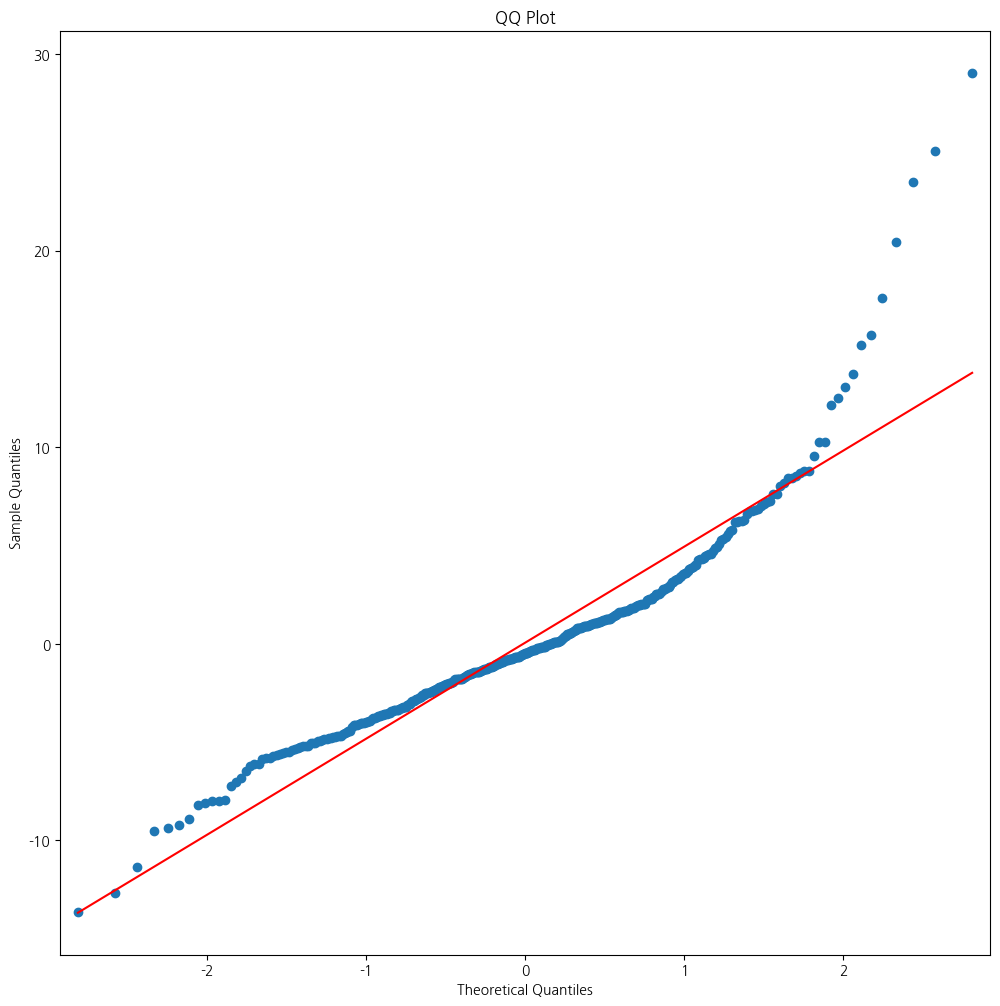

In [ ]:
model_residuals=model_trained.resid # model.resid는 각 항의 예측값과 실제값의 오차를 Series형태로 출력해주는 함수이다.
plt.rcParams['axes.unicode_minus']=False # plt의 기본 파라미터를 변경하여 음수 폰트 깨짐을 방지한다.

fig,ax=plt.subplots(1,1) # 1행 1열을 가진 서브플롯을 그린다
fig.set_figheight(12)
fig.set_figwidth(12)

#두 변수간의 분포를 비교한다, 주어진데이터와 정규분포를 비교하여 정규분포의 가정이 적절한지에 대해 검토할 때 활용
sm.ProbPlot(model_residuals).qqplot(line='s',color='b',ax=ax)
ax.title.set_text('QQ Plot')
plt.show()

# 확률오차의 등분산성 확인

<bound method NDFrame.head of 29     21.958043
499    21.495021
285    31.867683
415    -6.728442
124    15.333261
         ...    
110    20.823494
129    21.368144
58     32.794045
342    31.065462
117    22.694021
Length: 404, dtype: float64>


[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

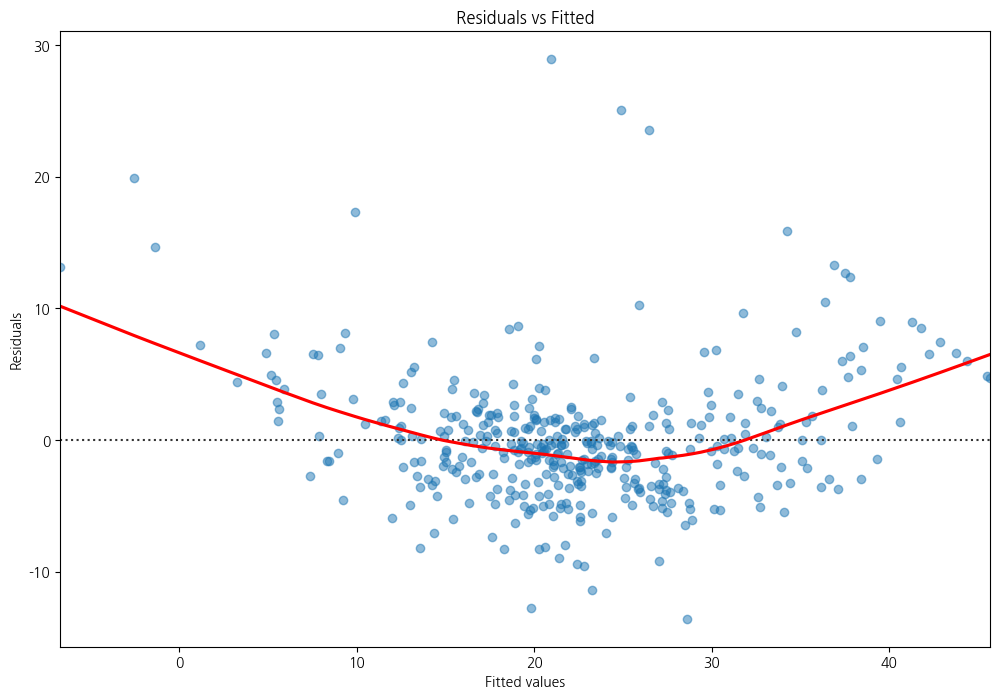

In [ ]:
#fittedvalues 메서드는 예측된 종속 변수의 추정치를 반환한다. 주어진 독립 변수에 대해 모델이 예측한 종속 변수의 값을 나타낸다.
model_fitted_y=model_trained.fittedvalues

fig,ax = plt.subplots(1,1)
fig.set_figheight(8)
fig.set_figwidth(12)

#회귀선을 기준으로 데이터들의 오차를 나타낸 그래프
sns.residplot(x=model_fitted_y,y=y_train,data=x_train,lowess=True,scatter_kws={'alpha':0.5},line_kws={'color':'red'},ax=ax)

# x축 추정치, y축 잔차
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values',ylabel='Residuals')

# 설명 : 통계적으로 해석하기

R-squared(결정계수) : 모델의 성능

coef(회귀계수)

P-value가 0.05 이하일 때 변수가 유의미 (분산분석은 궁극적으로 가설검정을 행하는 용도)

유의미하지 않은 변수는 제거한다.

In [ ]:
#다양한 통계량을 알려주는 summary
print(model_trained.summary())

                                 OLS Regression Results                                
Dep. Variable:                   medv   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              723.4
Date:                Thu, 06 Jul 2023   Prob (F-statistic):                   4.08e-264
Time:                        09:47:50   Log-Likelihood:                         -1214.1
No. Observations:                 404   AIC:                                      2454.
Df Residuals:                     391   BIC:                                      2506.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

summary 값을 통해 데이터와 모델에 대해 설명할 수 있다.

P-value 값이 높은 유의하지 않은 변수들 제거하고 다시 모델을 구축한다

In [ ]:
#유의하지 않은 indus와 age를 제거한 데이터로 다시 모델을 구축
model=sm.OLS(y_train,x_train.drop(['indus','age'],axis=1))
model_trained=model.fit()
print(model_trained.summary())

                                 OLS Regression Results                                
Dep. Variable:                   medv   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              858.9
Date:                Thu, 06 Jul 2023   Prob (F-statistic):                   5.23e-267
Time:                        14:52:29   Log-Likelihood:                         -1214.2
No. Observations:                 404   AIC:                                      2450.
Df Residuals:                     393   BIC:                                      2494.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

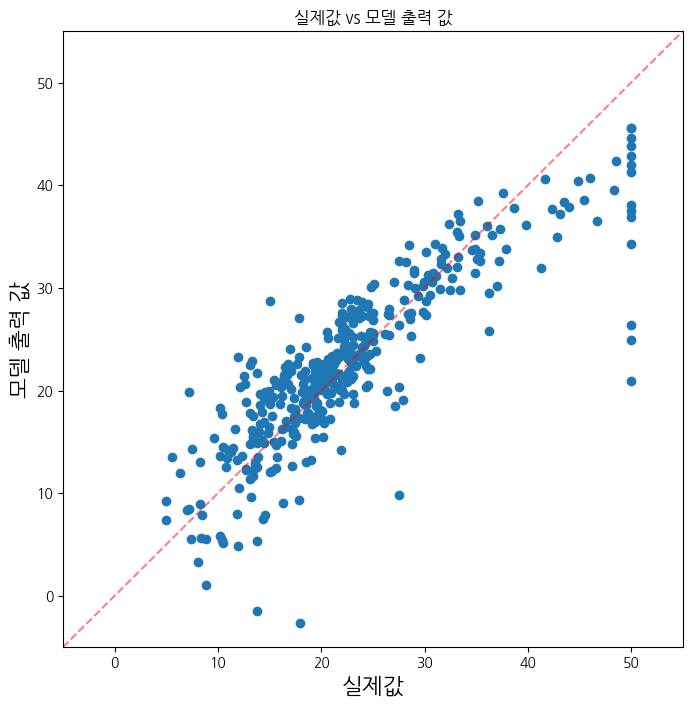

In [ ]:
#새로만든 모델의 추정값 반환
y_train_pred=model_trained.fittedvalues

plt.figure(figsize=(8,8))
plt.title('실제값 vs 모델 출력 값')
plt.scatter(y_train,y_train_pred)
plt.plot([-5,55],[-5,55],linestyle='--',color='r',alpha=0.5)
plt.xlabel('실제값',size=16)
plt.ylabel('모델 출력 값', size =16)
plt.xlim(-5,55)
plt.ylim(-5,55)
plt.show()

트레인세트에 대해 정상적으로 되었으니 테스트 셋에 대해서 해보면

In [ ]:
#predict method를 이용하여 x_test의 값을 예측
y_test_pred=model_trained.predict(x_test.drop(['indus','age'],axis=1))
y_test_pred.head()

211    22.180420
25     16.981775
37     20.991506
440    14.429330
162    36.561694
dtype: float64

# 모델 평가에 사용되는 지표들, 비용 함수

In [ ]:
#Mean Squared Error (평균 제곱 오차)
print(mean_squared_error(y_test,y_test_pred))

26.551373033308206


In [ ]:
#Root Mean Squared Error (제곱근 평균 제곱 오차)
print(np.sqrt(mean_squared_error(y_test,y_test_pred)))

5.152802444622558


In [ ]:
#Mean Absolute Percentage Error (평균 절대 오차)
print(mean_absolute_error(y_test,y_test_pred))

3.515344686258347


In [ ]:
#Mean Absolute Percentage Error (평균 절대 백분율 오차)
def mean_absolute_percentage_error(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
print(mean_absolute_percentage_error(y_test,y_test_pred))

43.86549288919351


비용함수가 작을 수록 더 좋은 모델이다. ( 파라미터들이 최적값)


어떤 모델이 더 좋은지 판단의 기준에 사용 되는 지표들이다.

In [ ]:
#결정계수
from sklearn.metrics import r2_score
print(r2_score(y_test,y_test_pred))

0.5843314211390356


# 최종 결과정리

In [ ]:
#훈련세트에 대한 값들
print('Training MSE : {:.3f}'.format(mean_squared_error(y_train,y_train_pred)))
print('Training RMSE : {:.3f}'.format(np.sqrt(mean_squared_error(y_train,y_train_pred))))
print('Training MAE : {:.3f}'.format(mean_absolute_error(y_train,y_train_pred)))
print('Training MAPE : {:.3f}'.format(mean_absolute_percentage_error(y_train,y_train_pred)))
print('Training R2 : {:.3f}'.format(r2_score(y_train,y_train_pred)))

Training MSE : 23.883
Training RMSE : 4.887
Training MAE : 3.344
Training MAPE : 50.994
Training R2 : 0.733


In [ ]:
#평가세트에 대한 값들
print('Testing MSE : {:.3f}'.format(mean_squared_error(y_test,y_test_pred)))
print('Testing RMSE : {:.3f}'.format(np.sqrt(mean_squared_error(y_test,y_test_pred))))
print('Testing MAE : {:.3f}'.format(mean_absolute_error(y_test,y_test_pred)))
print('Testing MAPE : {:.3f}'.format(mean_absolute_percentage_error(y_test,y_test_pred)))
print('Testing R2 : {:.3f}'.format(r2_score(y_test,y_test_pred)))

Testing MSE : 26.551
Testing RMSE : 5.153
Testing MAE : 3.515
Testing MAPE : 43.865
Testing R2 : 0.584


훈련세트로 모델을 구축했으므로 더 최적 값이 나온다.

# StatModels vs Sklearn


In [ ]:
# sklearn에서 선형회귀 import
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
lr=LinearRegression(fit_intercept=False) # fit_intercept를 True로 하면 절편 값을 구하고, False는 구하지 않는다.
lr.fit(x_train,y_train)
y_pred_skl=lr.predict(x_test)
lr_stat=sm.OLS(y_train,x_train).fit()
y_pred_stat=lr_stat.predict(x_test)

In [ ]:
# statModels 결과
print('Testing MSE : {:.3f}'.format(mean_squared_error(y_test,y_pred_stat)))
print('Testing RMSE : {:.3f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_stat))))
print('Testing MAE : {:.3f}'.format(mean_absolute_error(y_test,y_pred_stat)))
print('Testing MAPE : {:.3f}'.format(mean_absolute_percentage_error(y_test,y_pred_stat)))
print('Testing R2 : {:.3f}'.format(r2_score(y_test,y_pred_stat)))

Testing MSE : 26.671
Testing RMSE : 5.164
Testing MAE : 3.529
Testing MAPE : 43.857
Testing R2 : 0.582


In [ ]:
#sklearn 결과
print('Testing MSE : {:.3f}'.format(mean_squared_error(y_test,y_pred_skl)))
print('Testing RMSE : {:.3f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_skl))))
print('Testing MAE : {:.3f}'.format(mean_absolute_error(y_test,y_pred_skl)))
print('Testing MAPE : {:.3f}'.format(mean_absolute_percentage_error(y_test,y_pred_skl)))
print('Testing R2 : {:.3f}'.format(r2_score(y_test,y_pred_skl)))

Testing MSE : 26.671
Testing RMSE : 5.164
Testing MAE : 3.529
Testing MAPE : 18.022
Testing R2 : 0.582


보편적으로는 sklearn을 더 많이 사용하지만

통계적인 해석을 필요로 할 때는 StatModel을 더 많이 이용한다.